<a href="https://colab.research.google.com/github/OxxOrcus/machine-learning/blob/main/S%C3%A9rie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Connect google colab with google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Introdução às Séries Temporais

Uma **série temporal** é uma sequência de observações coletadas em intervalos regulares de tempo. Exemplos:

- Temperatura diária
- Preço de ações por minuto
- Vendas mensais
- Consumo de energia por hora

O objetivo da análise de séries temporais é entender padrões passados e fazer previsões futuras.

---

## Componentes de uma Série Temporal

1. **Tendência (Trend):** Direção geral da série ao longo do tempo (ex: crescimento ou queda).
2. **Sazonalidade (Seasonality):** Padrões que se repetem em intervalos fixos (ex: vendas maiores no Natal).
3. **Ciclo (Cycle):** Padrões não fixos, relacionados a fatores econômicos ou outros.
4. **Ruído (Noise):** Variações aleatórias sem padrão identificável.

---

## Tipos de Séries Temporais

- **Univariadas:** Apenas uma variável ao longo do tempo (ex: inflação mensal).
- **Multivariadas:** Duas ou mais variáveis ao longo do tempo (ex: inflação + juros + câmbio).

---

## Estacionariedade

Uma série é **estacionária** se suas propriedades estatísticas (média, variância, autocorrelação) não mudam ao longo do tempo.

A maioria dos modelos clássicos de séries temporais (como ARIMA) exigem que a série seja estacionária.


<ipython-input-2-0f16b6b3d7d9>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas = pd.date_range(start='2020-01-01', periods=24, freq='M')


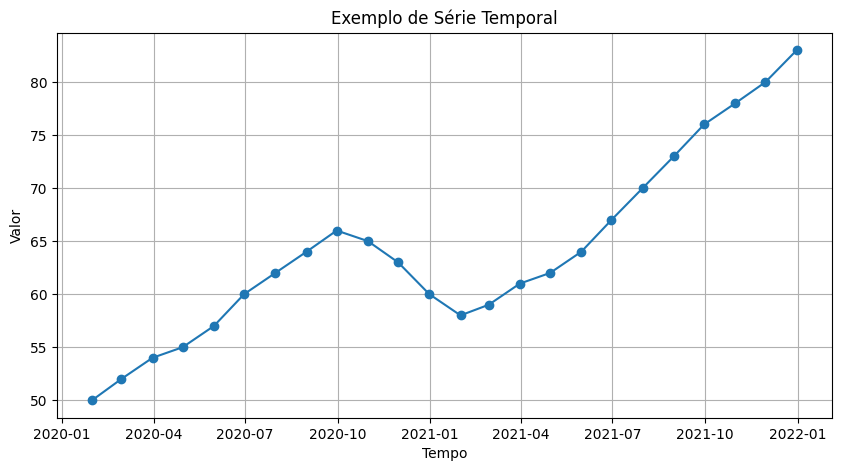

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando uma série temporal simples
datas = pd.date_range(start='2020-01-01', periods=24, freq='M')
valores = [50, 52, 54, 55, 57, 60, 62, 64, 66, 65, 63, 60,
           58, 59, 61, 62, 64, 67, 70, 73, 76, 78, 80, 83]

serie = pd.Series(data=valores, index=datas)

# Plotando a série
plt.figure(figsize=(10, 5))
plt.plot(serie, marker='o')
plt.title('Exemplo de Série Temporal')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()



# Componentes de uma Série Temporal

Ao analisar séries temporais, é comum decompô-las em quatro componentes principais:

---

## 1. Tendência (Trend)

A **tendência** representa o movimento de longo prazo da série temporal. Indica se os dados estão aumentando, diminuindo ou permanecendo estáveis ao longo do tempo.

- Exemplo: crescimento da população, aumento do preço do petróleo ao longo dos anos.
- Pode ser linear ou não linear.

📈 **Visualmente:** é uma linha que sobe, desce ou se mantém ao longo do tempo.

---

## 2. Sazonalidade (Seasonality)

A **sazonalidade** é um padrão que se repete em intervalos regulares, como dias, semanas, meses ou anos.

- Exemplo: aumento nas vendas de sorvete no verão, aumento de passagens aéreas em dezembro.
- Está relacionada a fatores conhecidos e repetitivos (clima, feriados, calendário).

📊 **Dica:** Se o padrão for previsível e fixo no tempo, provavelmente é sazonalidade.

---

## 3. Ciclo (Cycle)

O **ciclo** é uma variação de longo prazo, mas **não se repete em intervalos fixos** como a sazonalidade. Está frequentemente ligado à economia ou fenômenos complexos.

- Exemplo: ciclos econômicos (crise, recuperação, expansão).
- Pode durar anos e não é previsível com tanta precisão.

📉 Diferença importante:
- **Sazonalidade**: padrão fixo (ex: a cada 12 meses)
- **Ciclo**: padrão irregular (ex: dura 3 anos, depois 5, depois 4...)

---

## 4. Ruído (Noise ou Irregularidade)

O **ruído** é o componente aleatório e imprevisível da série. São variações que não seguem nenhum padrão claro.

- Exemplo: um acidente, uma greve, uma pandemia.
- Não conseguimos explicar com os componentes anteriores.

---

## Decomposição da Série Temporal

A série pode ser expressa como:

- Modelo **aditivo**:  
  `Série = Tendência + Sazonalidade + Ruído`
  
- Modelo **multiplicativo** (quando os efeitos dependem do nível da série):  
  `Série = Tendência × Sazonalidade × Ruído`

A escolha entre os dois depende da natureza dos dados (se a variação sazonal aumenta com o tempo → multiplicativo).

---



## ⚖️ Diferença entre modelo **aditivo** e **multiplicativo**

### 🔹 **Modelo Aditivo**

A série temporal é decomposta assim:

$$
\text{Valor Observado} = \text{Tendência} + \text{Sazonalidade} + \text{Ruído}
$$

**Características:**

* A **sazonalidade e o ruído** têm **amplitude constante** ao longo do tempo.
* Usado quando os efeitos sazonais **não aumentam ou diminuem com o tempo**.

📊 **Exemplo visual:**

* Vendas com variação sazonal de ±10 unidades, independentemente do ano.

---

### 🔸 **Modelo Multiplicativo**

A série é decomposta assim:

$$
\text{Valor Observado} = \text{Tendência} \times \text{Sazonalidade} \times \text{Ruído}
$$

**Características:**

* A **sazonalidade e o ruído** são **proporcionais ao nível da série**.
* Usado quando os efeitos sazonais **crescem ou encolhem ao longo do tempo**.

📊 **Exemplo visual:**

* Vendas com variação sazonal de **±10%** do valor total, e não ±10 unidades.

---

## ⚠️ Como saber qual usar?

| Critério                            | Modelo Aditivo | Modelo Multiplicativo |
| ----------------------------------- | -------------- | --------------------- |
| Amplitude sazonal constante         | ✅ Sim          | ❌ Não                 |
| Amplitude sazonal proporcional      | ❌ Não          | ✅ Sim                 |
| Série visualmente com padrão linear | ✅ Sim          | ❌ Não                 |
| Série com crescimento exponencial   | ❌ Não          | ✅ Sim                 |

---

## 💡 Dica: usando transformação log para tratar como aditivo

Você pode **transformar uma série multiplicativa em aditiva** aplicando log:

$$
\log(y_t) = \log(\text{Tendência}) + \log(\text{Sazonalidade}) + \log(\text{Ruído})
$$

Isso é útil se o algoritmo só aceita decomposição aditiva (por exemplo, muitos modelos estatísticos e de aprendizado de máquina).


# Usos Práticos de Séries Temporais

Séries temporais são aplicadas em praticamente todas as áreas onde os dados são registrados ao longo do tempo. Abaixo estão alguns exemplos concretos por setor:

---

## 📈 Finanças e Economia

- Previsão de preços de ações, moedas e commodities.
- Modelagem de inflação, juros, PIB, desemprego.
- Análise de risco com base em volatilidade histórica.

💡 *Exemplo:* prever o desempenho do mercado para decidir o melhor momento de importar produtos.
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm
---

## 🛍️ Varejo e Marketing

- Previsão de vendas (diárias, semanais, sazonais).
- Planejamento de estoque com base em demanda futura.
- Análise de comportamento do consumidor ao longo do tempo.

💡 *Exemplo:* ajustar promoções de acordo com a sazonalidade das vendas de passagens aéreas.
https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas
---

## 🏭 Indústria e Produção

- Planejamento de produção baseado em demanda futura.
- Manutenção preditiva de máquinas (com sensores registrando dados ao longo do tempo).
- Detecção de anomalias em séries de sensores.

💡 *Exemplo:* prever produção industrial e a melhor hora de investir.
https://dados.gov.br/dados/temas/industria
---

## 🌡️ Clima e Meio Ambiente

- Previsão de temperatura, chuva, vento, poluição.
- Monitoramento de séries históricas para detectar mudanças climáticas.

💡 *Exemplo:* prever uma onda de calor para reforçar alertas de saúde pública.
https://portal.inmet.gov.br/dadoshistoricos
---

## 🚑 Saúde

- Modelagem de surtos de doenças (ex: COVID-19).
- Monitoramento da ocupação hospitalar ou uso de leitos.
- Sinais vitais de pacientes em tempo real (monitoramento contínuo).

💡 *Exemplo:* prever crescimento de casos de dengue para antecipar ações do governo.
https://opendatasus.saude.gov.br/dataset
---

## 📡 Tecnologia e Web

- Previsão de tráfego em sites, redes e servidores.
- Detecção de ataques ou anomalias em logs de sistemas.
- Otimização de uso de recursos em nuvem (escalabilidade).

💡 *Exemplo:* prever picos de acesso em um site de e-commerce durante Black Friday.
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
---


Séries temporais são ferramentas poderosas para **prever o futuro, detectar padrões e tomar decisões baseadas no tempo.**


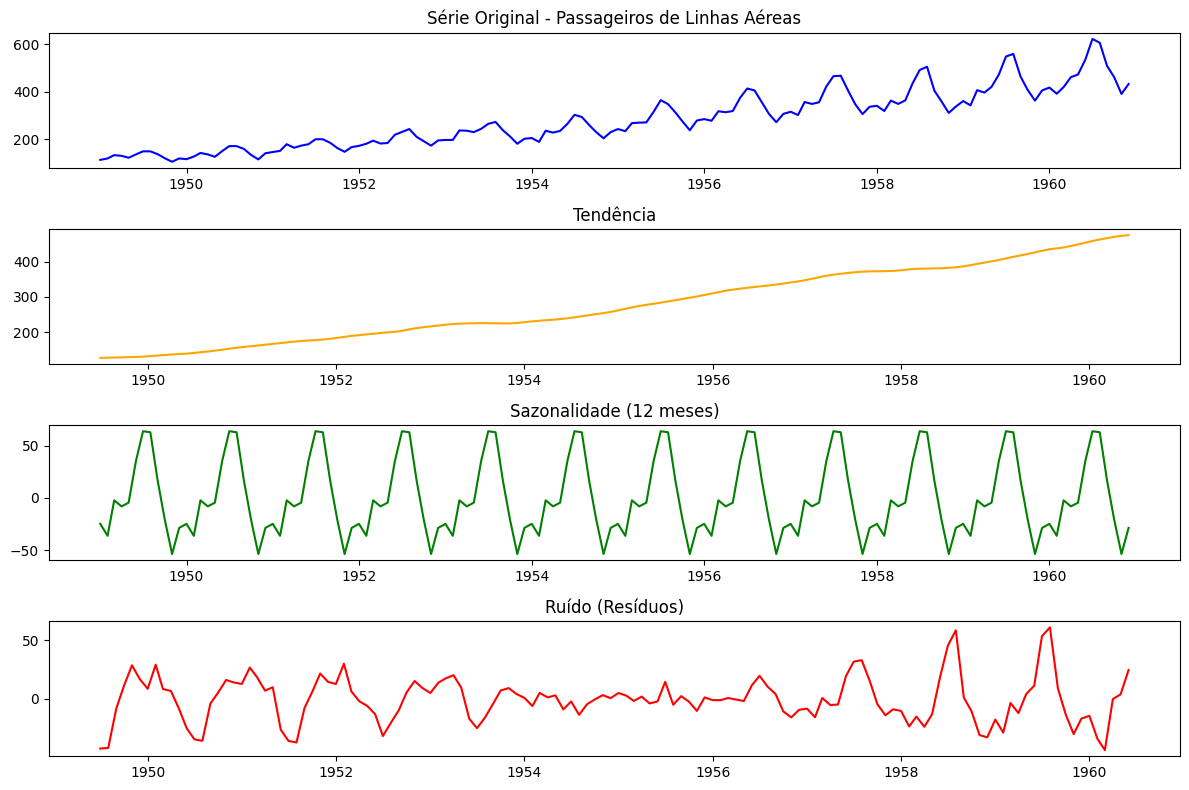

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregando os dados
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

# Convertendo a coluna 'Month' para datetime e definindo como índice
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Série temporal
serie = df['Passengers']

# Decomposição da série (modelo aditivo, period=12 por ser mensal com sazonalidade anual)
decomposicao = seasonal_decompose(serie, model='additive', period=12)

# Plotando a decomposição
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(serie, label='Original', color='blue')
plt.title('Série Original - Passageiros de Linhas Aéreas')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade (12 meses)')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Ruído (Resíduos)', color='red')
plt.title('Ruído (Resíduos)')

plt.tight_layout()
plt.show()


In [ ]:
# Acessando os componentes
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuos = decomposicao.resid

# Suponha que estamos no mês 24 (último da série)
ultimo_mes = serie.index[-1]
print(f"Análise do mês: {ultimo_mes.strftime('%B/%Y')}")

# Pega os valores de tendência e sazonalidade no último mês
valor_real = serie[ultimo_mes]
valor_tendencia = tendencia[ultimo_mes]
valor_sazonal = sazonalidade[ultimo_mes]
valor_ruido = residuos[ultimo_mes]

print(f"Valor observado: {valor_real}")
print(f"Tendência estimada: {valor_tendencia:.2f}")
print(f"Componente sazonal: {valor_sazonal:.2f}")
print(f"Ruído (diferença inesperada): {valor_ruido:.2f}")

# Tomando uma decisão com base nisso:
if pd.notna(valor_ruido) and valor_ruido > 5:
    print("⚠️ Houve um pico inesperado de vendas — considerar revisar o estoque.")
elif pd.notna(valor_ruido) and valor_ruido < -5:
    print("📉 Queda inesperada — investigar causas externas (clima, concorrência, etc).")
else:
    print("✅ Vendas dentro do esperado — seguir planejamento normal.")


Análise do mês: December/2022
Valor observado: 95
Tendência estimada: nan
Componente sazonal: 0.98
Ruído (diferença inesperada): nan
✅ Vendas dentro do esperado — seguir planejamento normal.


# 🔮 Forecasting com Prophet

## O que é Forecasting?

**Forecasting** (ou previsão) é o processo de estimar valores futuros com base em dados históricos. Em séries temporais, isso significa prever os próximos pontos da série com base nos padrões observados.

---

## Por que usar o Prophet?

O **Facebook Prophet** é uma biblioteca desenvolvida para fazer previsões de séries temporais com foco em:

✅ Facilidade de uso  
✅ Detecção automática de tendências e sazonalidades  
✅ Tratamento de feriados e outliers  
✅ Performance robusta em séries com sazonalidade clara

---

## Como o Prophet funciona?

O Prophet assume que uma série temporal pode ser decomposta assim:

> `y(t) = tendência + sazonalidade + feriados + erro`

Ele ajusta um modelo aditivo e oferece previsões com **intervalo de confiança**, além de mostrar a contribuição de cada componente (como sazonalidade semanal, anual etc).

---


In [ ]:
valores

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z29m_n8/ch4jw_yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z29m_n8/48sa2_kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89690', 'data', 'file=/tmp/tmp_z29m_n8/ch4jw_yq.json', 'init=/tmp/tmp_z29m_n8/48sa2_kq.json', 'output', 'file=/tmp/tmp_z29m_n8/prophet_model1u68e0dr/prophet_model-20250506134601.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:46:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


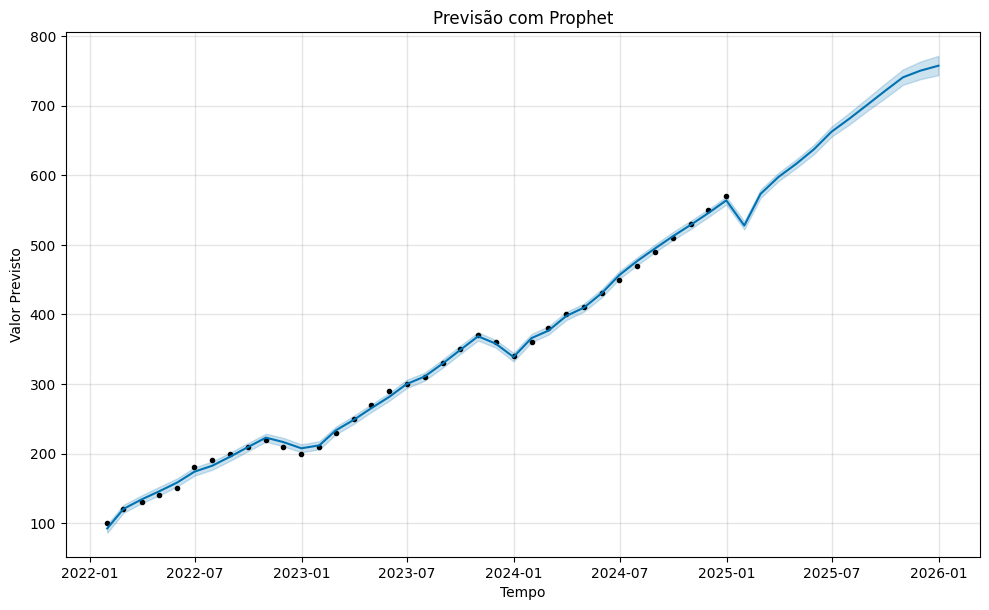

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Criando um DataFrame com dados sintéticos de vendas mensais
datas = pd.date_range(start='2022-01-01', periods=36, freq='ME')
valores = [100, 120, 130, 140, 150, 180, 190, 200, 210, 220, 210, 200,
           210, 230, 250, 270, 290, 300, 310, 330, 350, 370, 360, 340,
           360, 380, 400, 410, 430, 450, 470, 490, 510, 530, 550, 570]

df = pd.DataFrame({'ds': datas, 'y': valores})  # Prophet exige colunas 'ds' e 'y'

# Criando e ajustando o modelo
modelo = Prophet()
modelo.fit(df)

# Criando datas futuras para previsão
futuro = modelo.make_future_dataframe(periods=12, freq='ME')  # prever 12 meses à frente

# Fazendo a previsão
previsao = modelo.predict(futuro)

# Plotando a previsão
modelo.plot(previsao)
plt.title("Previsão com Prophet")
plt.xlabel("Tempo")
plt.ylabel("Valor Previsto")
plt.show()


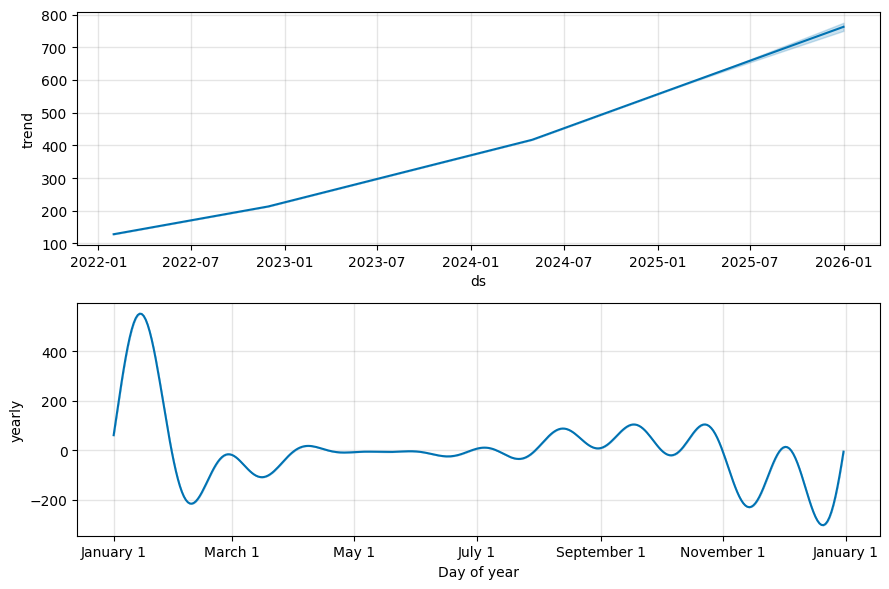

In [ ]:
modelo.plot_components(previsao)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Lendo diretamente do repositório online
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

# Renomeando colunas para o formato exigido pelo Prophet
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])  # Garantindo que a coluna de data esteja no formato datetime

# Visualizando os primeiros dados
df.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


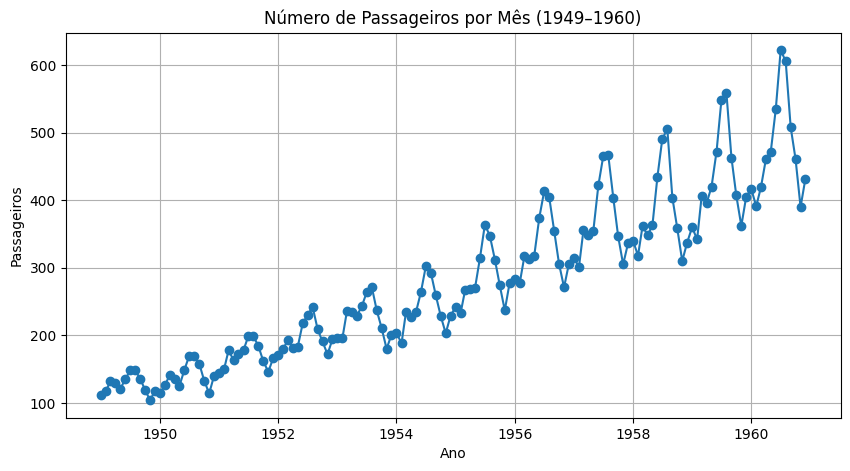

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], marker='o')
plt.title("Número de Passageiros por Mês (1949–1960)")
plt.xlabel("Ano")
plt.ylabel("Passageiros")
plt.grid(True)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z29m_n8/xed25eza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z29m_n8/rd8ub454.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60006', 'data', 'file=/tmp/tmp_z29m_n8/xed25eza.json', 'init=/tmp/tmp_z29m_n8/rd8ub454.json', 'output', 'file=/tmp/tmp_z29m_n8/prophet_modeljth26yeg/prophet_model-20250506142336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

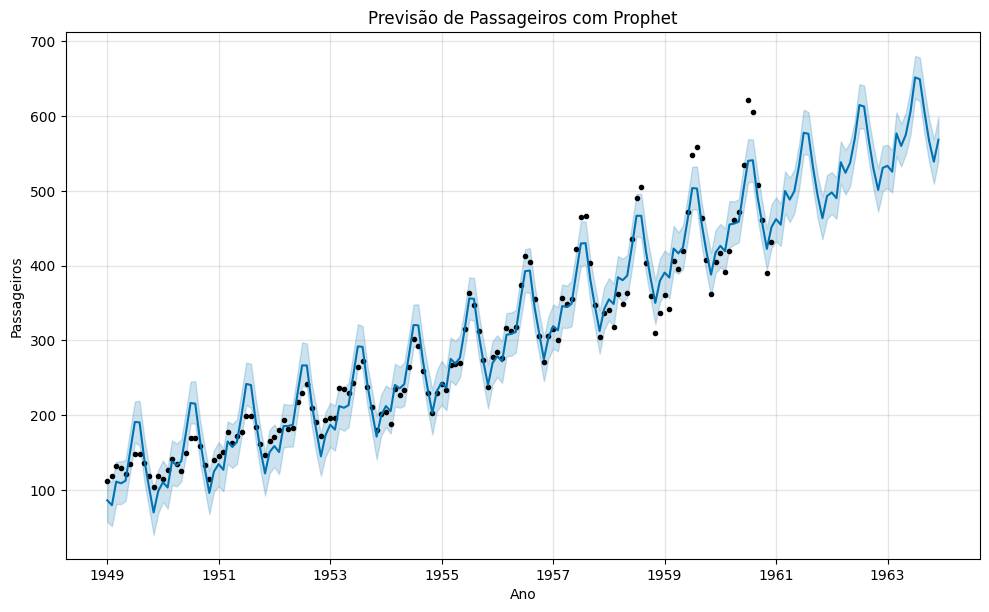

In [ ]:
from prophet import Prophet

# Criando e treinando o modelo
modelo = Prophet()
modelo.fit(df)

# Criando datas futuras (previsão para 36 meses à frente)
futuro = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(futuro)

# Plotando a previsão
modelo.plot(previsao)
plt.title("Previsão de Passageiros com Prophet")
plt.xlabel("Ano")
plt.ylabel("Passageiros")
plt.show()


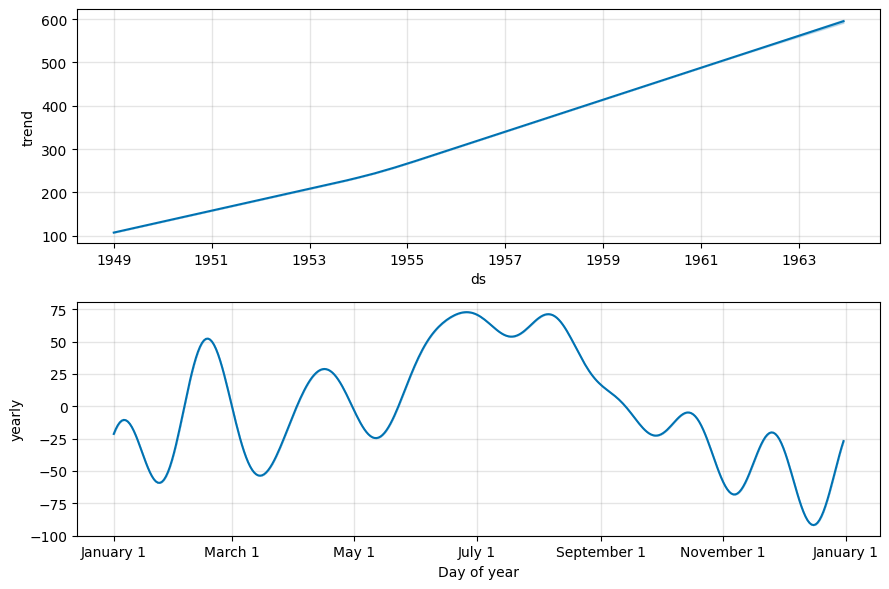

In [ ]:
modelo.plot_components(previsao)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
# Lendo diretamente do repositório online
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

In [ ]:
df.shape

(144, 2)